In [86]:
library(UsingR)

str(galton)

'data.frame':	928 obs. of  2 variables:
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...


In [87]:
?galton

galton                 package:UsingR                  R Documentation

_G_a_l_t_o_n'_s _h_e_i_g_h_t _d_a_t_a _f_o_r _p_a_r_e_n_t_s _a_n_d _c_h_i_l_d_r_e_n

_D_e_s_c_r_i_p_t_i_o_n:

     Data set from tabulated data set used by Galton in 1885 to study
     the relationship between a parent's height and their childrens.

_U_s_a_g_e:

     data(galton)
     
_F_o_r_m_a_t:

     A data frame with 928 observations on the following 2 variables.

     child The child's height

     parent The “midparent” height

_D_e_t_a_i_l_s:

     The midparent's height is an average of the fathers height and
     1.08 times the mother's. In the data there are 205 different
     parents and 928 children.  The data here is truncated at the ends
     for both parents and children so that it can be treated as numeric
     data. The data were tabulated and consequently made discrete. The
     ‘father.son’ data set is similar data used by Galto

In [88]:
head(galton)

,child,parent
,<dbl>,<dbl>
1,61.7,70.5
2,61.7,68.5
3,61.7,65.5
4,61.7,64.5
5,61.7,64.0
6,62.2,67.5


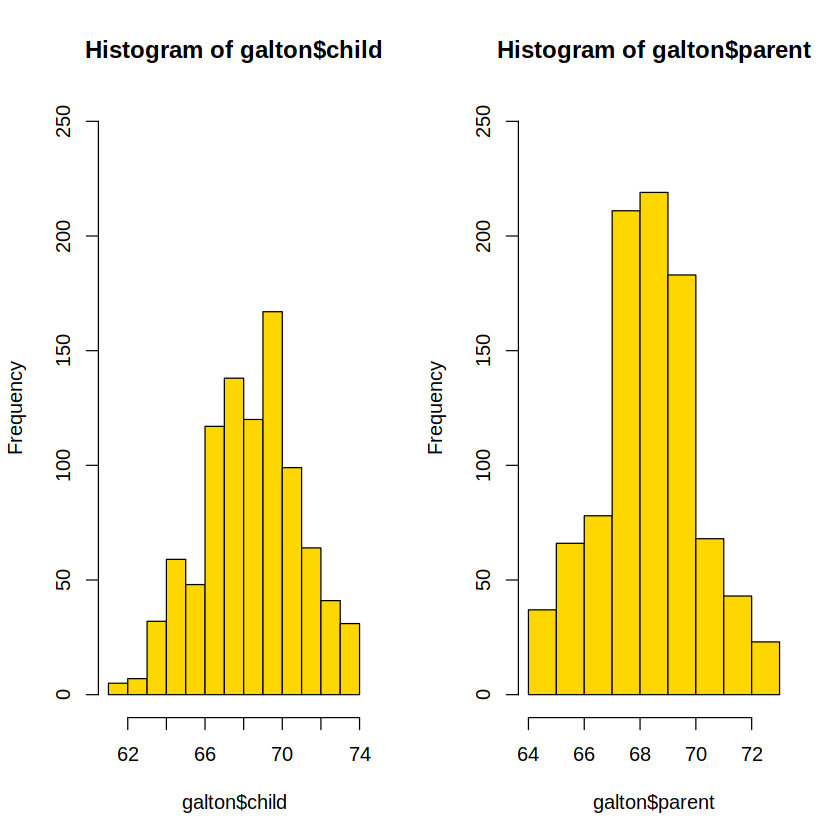

In [89]:
par(mfrow=c(1,2))

hist(galton$child, col='gold', breaks = 10, ylim=c(0,250))
hist(galton$parent, col='gold', breaks = 10, ylim=c(0,250))

In [90]:
c <- c(2,3,6,4,7,4,8,6)
s <- c(8,9,18,17,21,14,27,22)

df <- data.frame(cost=c, sales=s)

cor(df)

,cost,sales
cost,1.0000000,0.9550718
sales,0.9550718,1.0000000


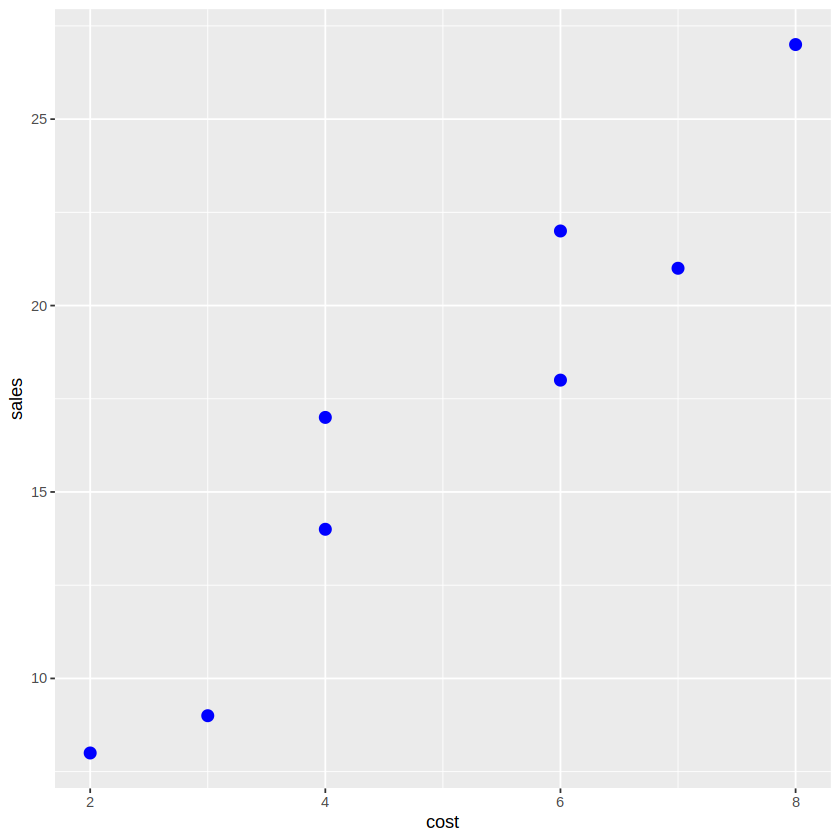

In [91]:
library(ggplot2)

p <- ggplot(df, aes(cost, sales))
p + geom_point(size=3, color='blue')

In [92]:
cor.test(df$cost, df$sales)


	Pearson's product-moment correlation

data:  df$cost and df$sales
t = 7.8935, df = 6, p-value = 0.0002192
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7657768 0.9920691
sample estimates:
      cor 
0.9550718 


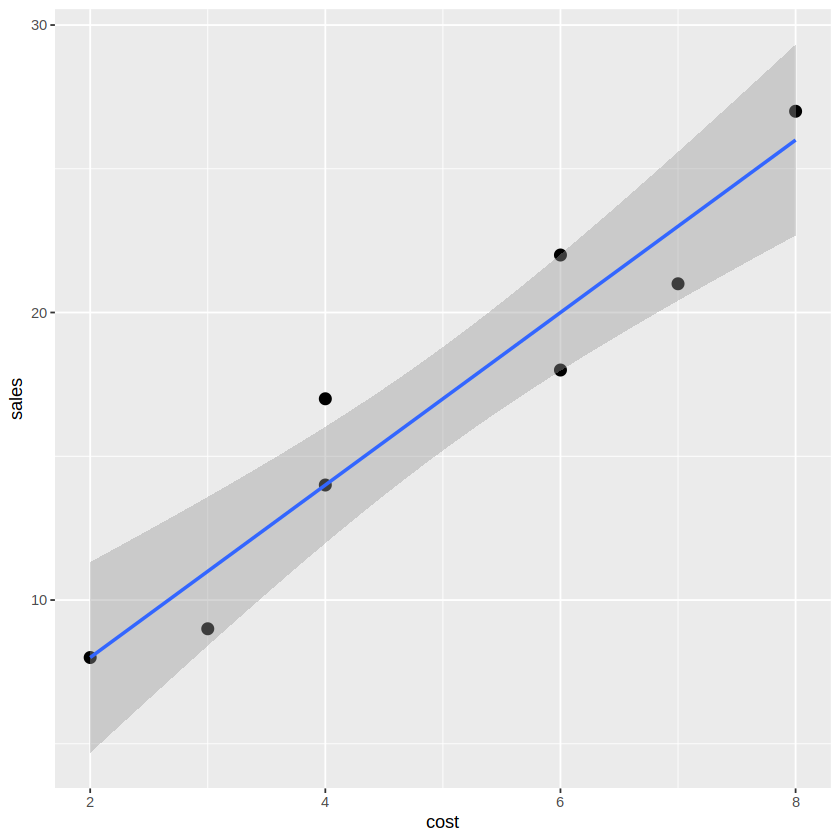

In [93]:
p <- ggplot(df, aes(cost, sales))
p + geom_point(size=3) + 
geom_smooth(method='lm', formula='y~x')

In [94]:
reg <- lm(sales ~ cost, data=df)
reg


Call:
lm(formula = sales ~ cost, data = df)

Coefficients:
(Intercept)         cost  
          2            3  


In [95]:
summary(reg)


Call:
lm(formula = sales ~ cost, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -2.00  -2.00   0.00   1.25   3.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0000     2.0378   0.981 0.364281    
cost          3.0000     0.3801   7.894 0.000219 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.082 on 6 degrees of freedom
Multiple R-squared:  0.9122,	Adjusted R-squared:  0.8975 
F-statistic: 62.31 on 1 and 6 DF,  p-value: 0.0002192


In [96]:
class(reg)

[1] "lm"

In [97]:
reg$coefficients

(Intercept)        cost 
          2           3

In [98]:
reg$residuals

1             2             3             4             5 
-6.106227e-15 -2.000000e+00 -2.000000e+00  3.000000e+00 -2.000000e+00 
            6             7             8 
 2.084555e-15  1.000000e+00  2.000000e+00

In [99]:
reg$fitted.values

1  2  3  4  5  6  7  8 
 8 11 20 14 23 14 26 20

In [100]:
df$fitted <- reg$fitted.values
df$residuals <- reg$residuals
df

cost,sales,fitted,residuals
<dbl>,<dbl>,<dbl>,<dbl>
2,8,8,-6.106227e-15
3,9,11,-2.000000e+00
6,18,20,-2.000000e+00
4,17,14,3.000000e+00
7,21,23,-2.000000e+00
4,14,14,2.084555e-15
8,27,26,1.000000e+00
6,22,20,2.000000e+00


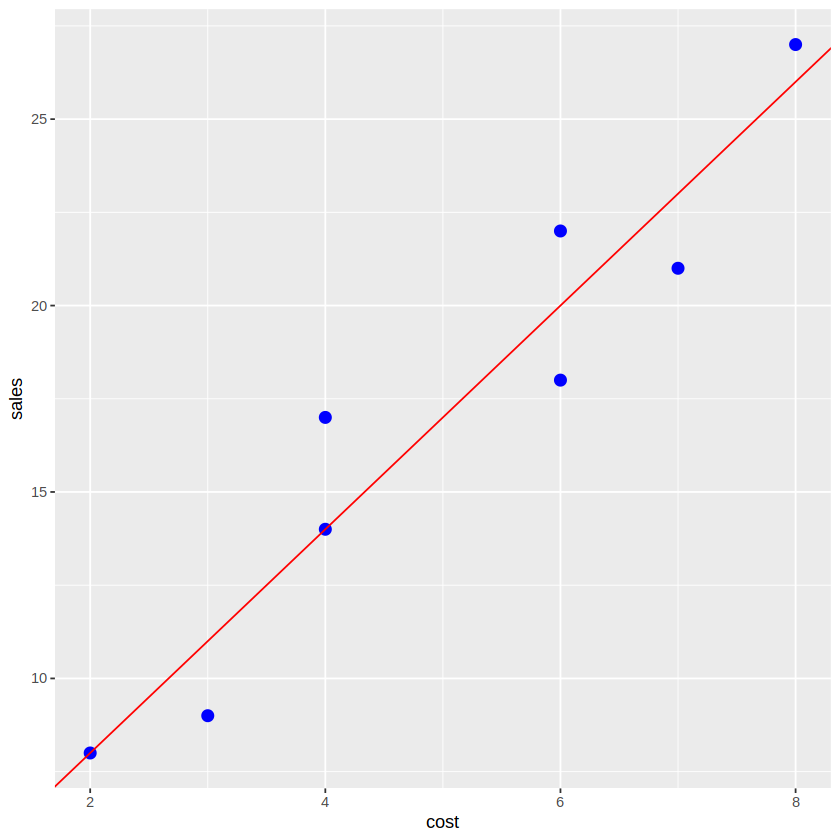

In [101]:
p <- ggplot(df, aes(cost, sales)) + 
        geom_point(size=3, color='blue')
p <- p + geom_abline(intercept=reg$coefficients[1], 
        slope=reg$coefficients[2], color='red')
p

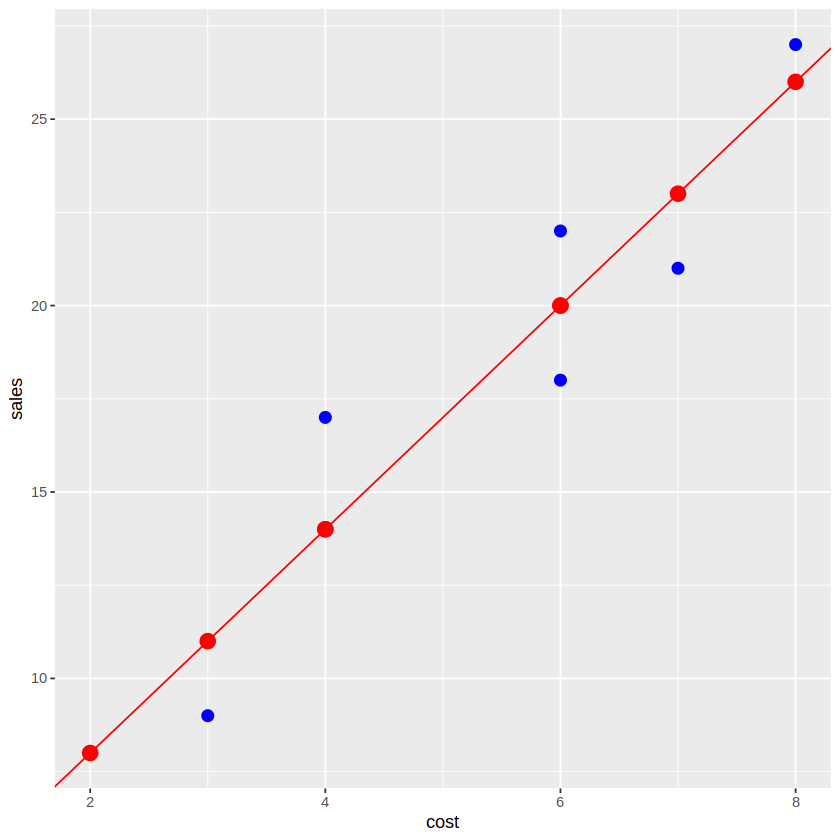

In [102]:
p <- ggplot(df, aes(cost, sales)) + 
        geom_point(size=3, color='blue')
p <- p + geom_abline(intercept=reg$coefficients[1], 
        slope=reg$coefficients[2], color='red')
p + geom_point(aes(y=fitted), color='red', size=4)

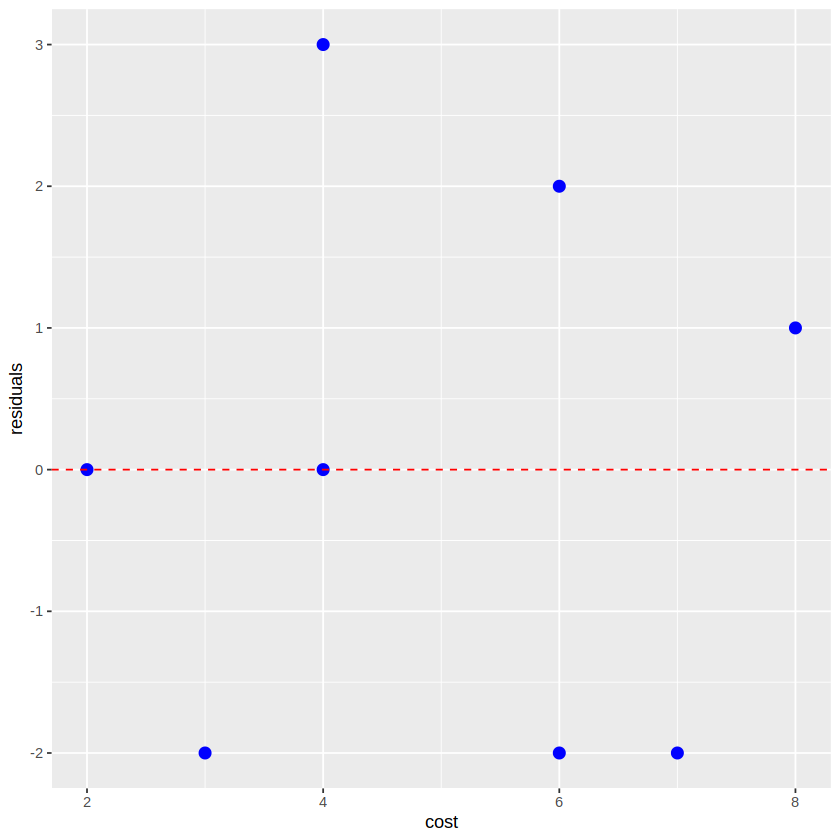

In [103]:
p <- ggplot(df, aes(cost, residuals))
p + geom_point(size=3 , color='blue') +
    geom_hline(yintercept = 0 , color='red', linetype=2)

In [104]:
x <- data.frame(cost=1:10)
x$predict <- predict(reg, x)
x

cost,predict
<int>,<dbl>
1,5
2,8
3,11
4,14
5,17
6,20
7,23
8,26
9,29


In [105]:
library(readxl)

data <- read_xlsx("../mydata/hw2-2기말성적예측-2022.xlsx")
head(data, 10)

no,중간,기말
<dbl>,<dbl>,<dbl>
1,22.0,26
2,26.0,33
3,33.0,41
4,37.5,38
5,38.0,42
6,38.0,52
7,39.0,28
8,40.0,27
9,43.5,52


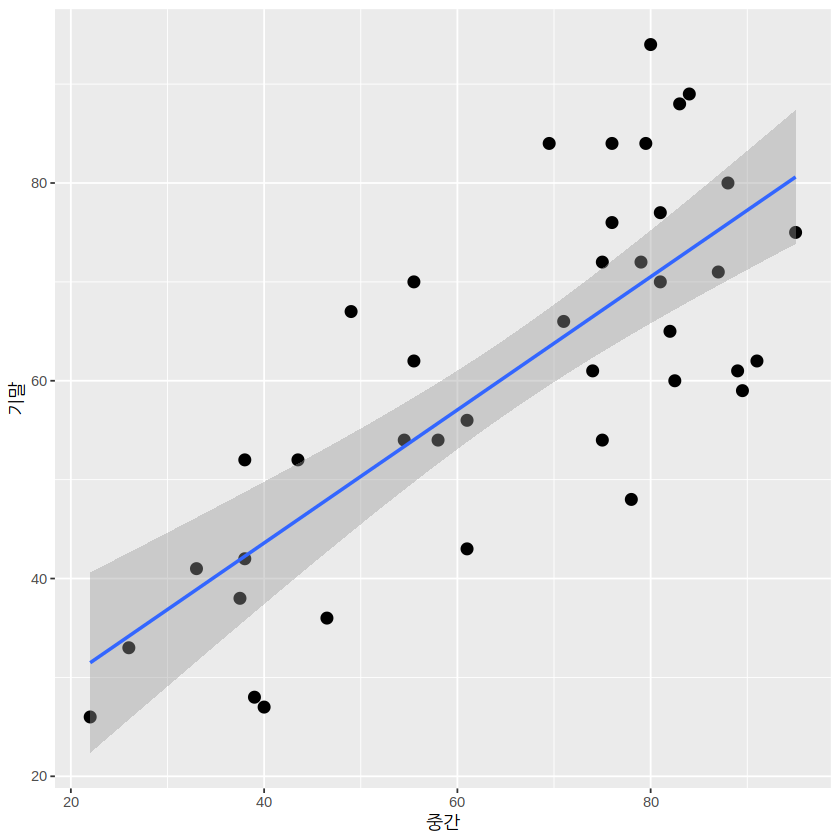

In [106]:
p <- ggplot(data, aes(중간, 기말))
p + geom_point(size=3) +
    geom_smooth(method='lm', formula='y~x')

In [107]:
reg <- lm(기말 ~ 중간, data=data)
reg


Call:
lm(formula = 기말 ~ 중간, data = data)

Coefficients:
(Intercept)         중간  
    16.6804       0.6729  


In [108]:
df <- data.frame(중간=seq(30,90,10))
df$회귀예측 <- predict(reg, df)
df

중간,회귀예측
<dbl>,<dbl>
30,36.86847
40,43.59784
50,50.32720
60,57.05656
70,63.78592
80,70.51528
90,77.24464


In [109]:
x <- seq(30, 90, 10)
mid_avg <- mean(data$중간)
mid_sd <- sd(data$중간)

z_score <- (x - mid_avg) / mid_sd

final_avg <- mean(data$기말)
final_sd <- sd(data$기말)

df$표준예측 <- z_score * final_sd + final_avg
df

중간,회귀예측,표준예측
<dbl>,<dbl>,<dbl>
30,36.86847,29.23092
40,43.59784,38.10566
50,50.32720,46.98040
60,57.05656,55.85514
70,63.78592,64.72989
80,70.51528,73.60463
90,77.24464,82.47937


In [110]:
carsales <- read_xlsx("../mydata/중고차시세.xlsx")
head(carsales)

거리,가격
<dbl>,<dbl>
26839,1800
28000,1870
29000,1840
30000,1890
30000,1790
30902,1920


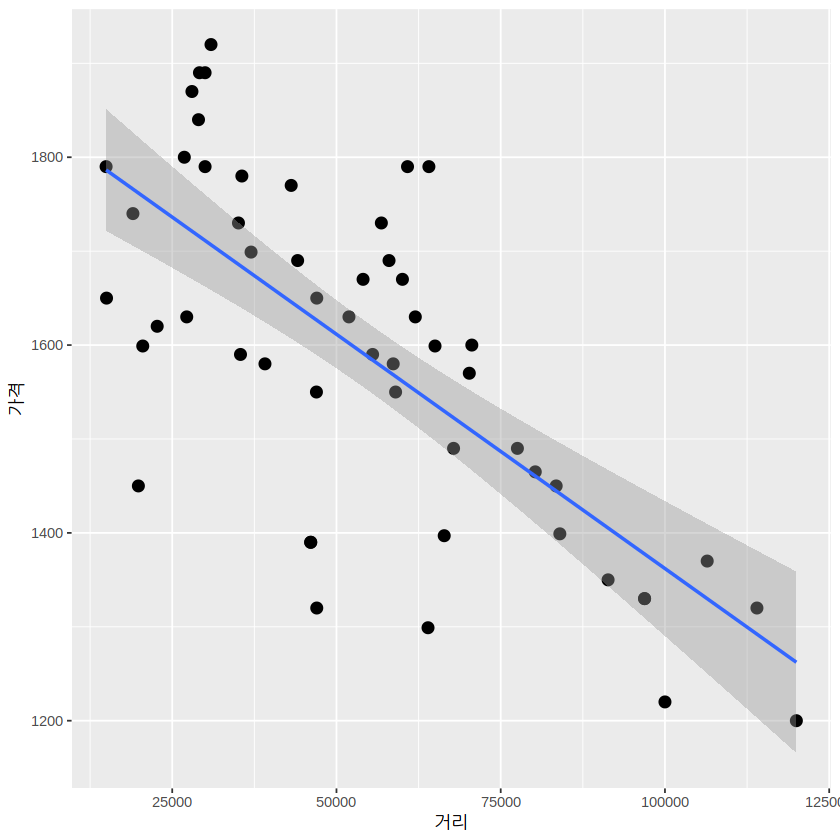

In [111]:
p <- ggplot(carsales, aes(거리, 가격))
p + geom_point(size=3) +
    geom_smooth(method='lm', formula='y~x')

In [112]:
cor(carsales)

,거리,가격
거리,1.0000000,-0.7120594
가격,-0.7120594,1.0000000


In [113]:
reg <- lm(가격 ~ 거리, data=carsales)
summary(reg)


Call:
lm(formula = 가격 ~ 거리, data = carsales)

Residuals:
    Min      1Q  Median      3Q     Max 
-311.93  -73.09   13.76   78.71  248.70 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.861e+03  4.123e+01  45.141  < 2e-16 ***
거리        -4.990e-03  6.823e-04  -7.313 1.57e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131.2 on 52 degrees of freedom
Multiple R-squared:  0.507,	Adjusted R-squared:  0.4975 
F-statistic: 53.48 on 1 and 52 DF,  p-value: 1.567e-09


In [114]:
carsales$fitted <- reg$fitted.values
carsales$fitted

1        2        3        4        5        6        7        8 
1727.056 1721.263 1716.274 1711.284 1711.284 1706.784 1685.933 1683.343 
       9       10       11       12       13       14       15       16 
1676.358 1645.882 1626.712 1626.463 1584.052 1571.578 1568.410 1566.589 
      17       18       19       20       21       22       23       24 
1561.394 1551.620 1536.651 1529.666 1522.566 1510.616 1508.700 1474.073 
      25       26       27       28       29       30       31       32 
1460.517 1444.640 1441.851 1405.208 1377.496 1377.496 1362.019 1329.936 
      33       34       35       36       37       38       39       40 
1292.165 1262.228 1786.456 1786.127 1766.079 1761.933 1758.615 1747.653 
      41       42       43       44       45       46       47       48 
1725.220 1715.550 1684.386 1665.800 1640.987 1631.073 1631.033 1626.463 
      49       50       51       52       53       54 
1602.019 1591.292 1577.406 1557.533 1541.965 1541.302

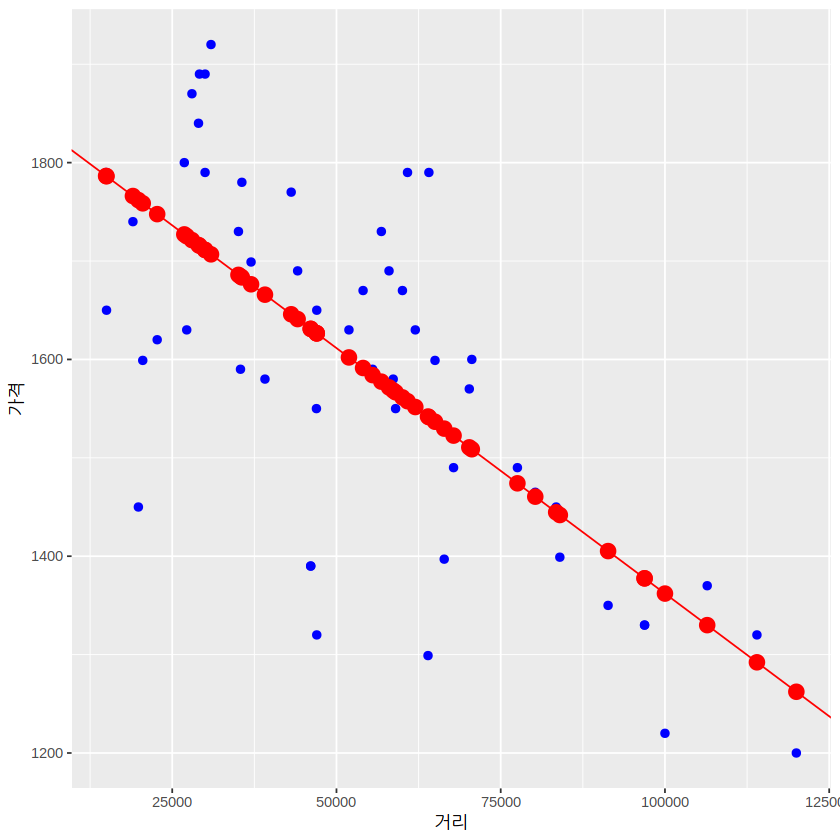

In [115]:
p <- ggplot(carsales, aes(거리, 가격)) + 
        geom_point(size=2, color='blue')
p <- p + geom_abline(intercept=reg$coefficients[1], 
        slope=reg$coefficients[2], color='red')
p + geom_point(aes(y=fitted), color='red', size=4)

In [116]:
df <- data.frame(거리 = seq(30000, 150000, 10000))
df$predict <- predict(reg, df)
df

거리,predict
<dbl>,<dbl>
30000,1711.284
40000,1661.389
50000,1611.494
60000,1561.599
70000,1511.704
80000,1461.809
90000,1411.914
100000,1362.019
110000,1312.123


In [117]:
?women

women                 package:datasets                 R Documentation

_A_v_e_r_a_g_e _H_e_i_g_h_t_s _a_n_d _W_e_i_g_h_t_s _f_o_r _A_m_e_r_i_c_a_n _W_o_m_e_n

_D_e_s_c_r_i_p_t_i_o_n:

     This data set gives the average heights and weights for American
     women aged 30-39.

_U_s_a_g_e:

     women
     
_F_o_r_m_a_t:

     A data frame with 15 observations on 2 variables.

       ‘[,1]’  ‘height’  numeric  Height (in)  
       ‘[,2]’  ‘weight’  numeric  Weight (lbs) 
      
_D_e_t_a_i_l_s:

     The data set appears to have been taken from the American Society
     of Actuaries _Build and Blood Pressure Study_ for some (unknown to
     us) earlier year.

     The World Almanac notes: “The figures represent weights in
     ordinary indoor clothing and shoes, and heights with shoes”.

_S_o_u_r_c_e:

     The World Almanac and Book of Facts, 1975.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Int

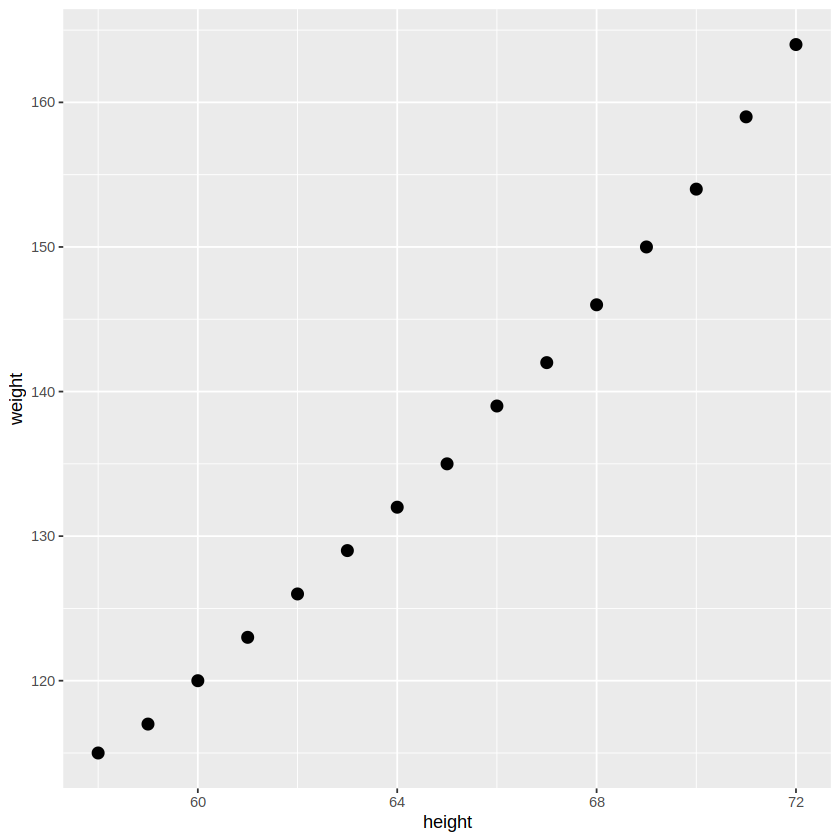

In [118]:
# 산점도

p <- ggplot(women, aes(height, weight))
p + geom_point(size=3)

In [119]:
cor(women)

,height,weight,residuals
height,1.000000e+00,0.99549477,2.031126e-15
weight,9.954948e-01,1.00000000,9.481649e-02
residuals,2.031126e-15,0.09481649,1.000000e+00


In [120]:
reg <- lm(weight ~ height, data=women)
summary(reg)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


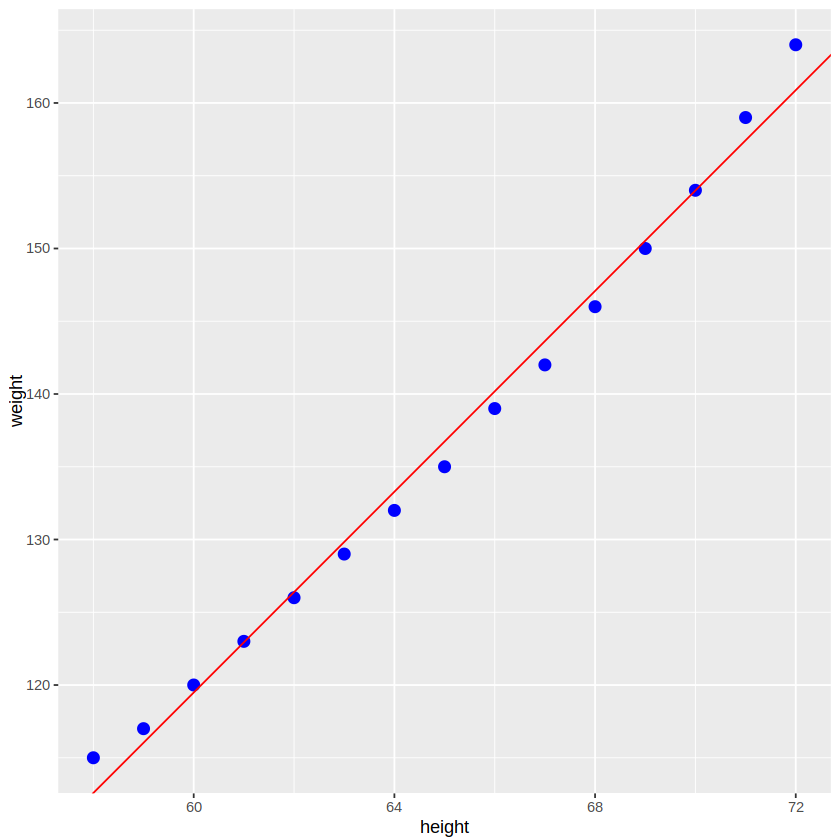

In [121]:
p <- ggplot(women, aes(height, weight)) + 
        geom_point(size=3, color='blue')
p <- p + geom_abline(intercept=reg$coefficients[1], 
        slope=reg$coefficients[2], color='red')
p

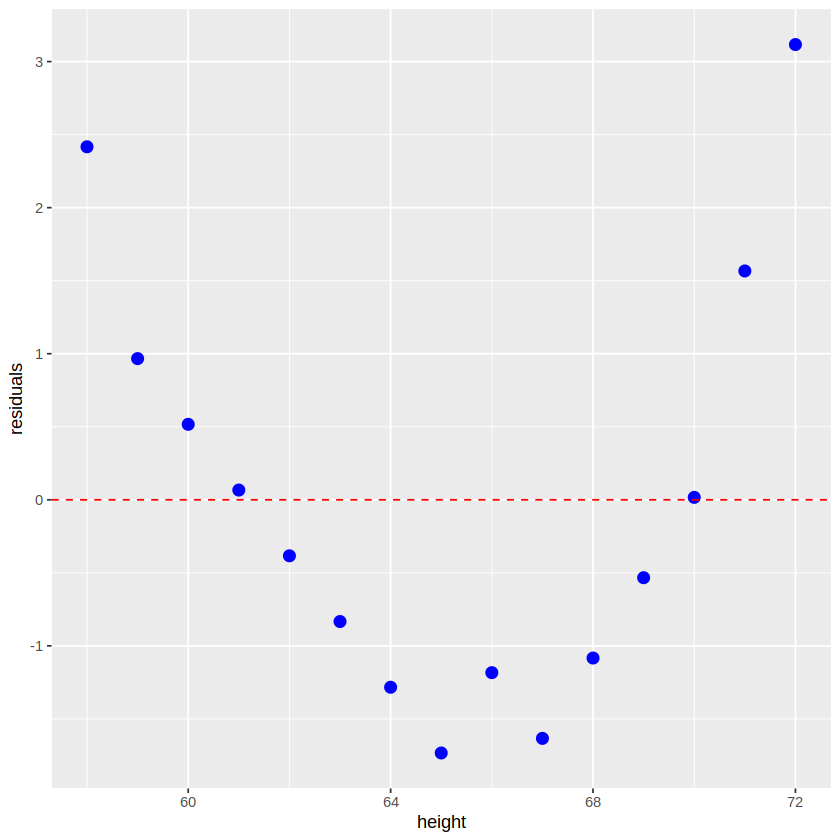

In [122]:
women$residuals <- reg$residuals

p <- ggplot(women, aes(height, residuals))
p + geom_point(size=3, color='blue') +
    geom_hline(yintercept=0, color='red', linetype=2)

In [123]:
# SPSS 확인용
write.csv(women, "women.csv")

In [124]:
reg2 <- lm(weight ~ height + I(height^2), data=women)
summary(reg2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


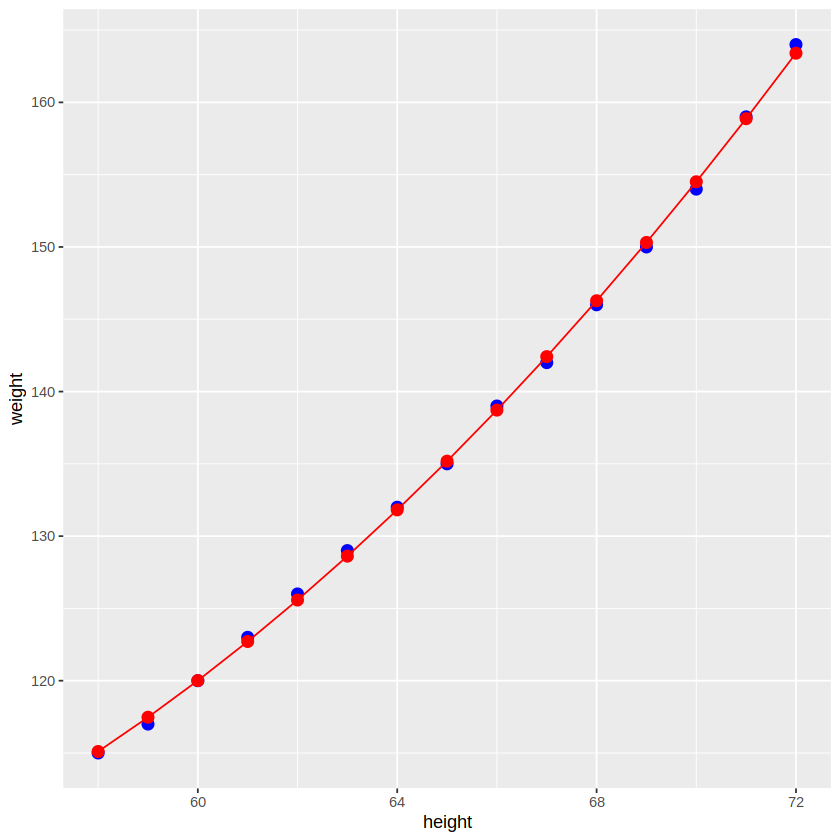

In [125]:
women$fitted <- reg2$fitted.values

p <- ggplot(women, aes(height, weight))
p <- p + geom_point(size=3, color='blue')
p + geom_point(aes(y=fitted), color='red', size=3) +
    geom_line(aes(y=fitted), color='red')

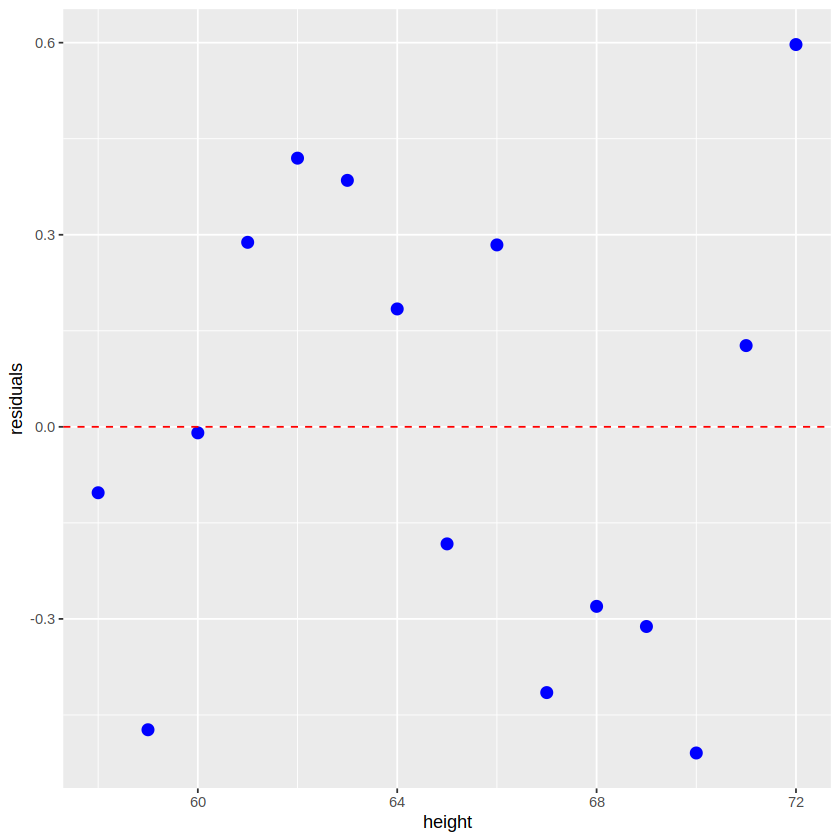

In [126]:
women$residuals <- reg2$residuals

p <- ggplot(women, aes(height, residuals))
p + geom_point(size=3, color='blue') +
    geom_hline(yintercept=0, color='red', linetype=2)

In [127]:
options(digits=2)

cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.681,-0.87,0.419,0.66,0.600,0.48,-0.551
cyl,-0.85,1.00,0.90,0.83,-0.700,0.78,-0.591,-0.81,-0.523,-0.49,0.527
disp,-0.85,0.90,1.00,0.79,-0.710,0.89,-0.434,-0.71,-0.591,-0.56,0.395
hp,-0.78,0.83,0.79,1.00,-0.449,0.66,-0.708,-0.72,-0.243,-0.13,0.750
drat,0.68,-0.70,-0.71,-0.45,1.000,-0.71,0.091,0.44,0.713,0.70,-0.091
wt,-0.87,0.78,0.89,0.66,-0.712,1.00,-0.175,-0.55,-0.692,-0.58,0.428
qsec,0.42,-0.59,-0.43,-0.71,0.091,-0.17,1.000,0.74,-0.230,-0.21,-0.656
vs,0.66,-0.81,-0.71,-0.72,0.440,-0.55,0.745,1.00,0.168,0.21,-0.570
am,0.60,-0.52,-0.59,-0.24,0.713,-0.69,-0.230,0.17,1.000,0.79,0.058
gear,0.48,-0.49,-0.56,-0.13,0.700,-0.58,-0.213,0.21,0.794,1.00,0.274


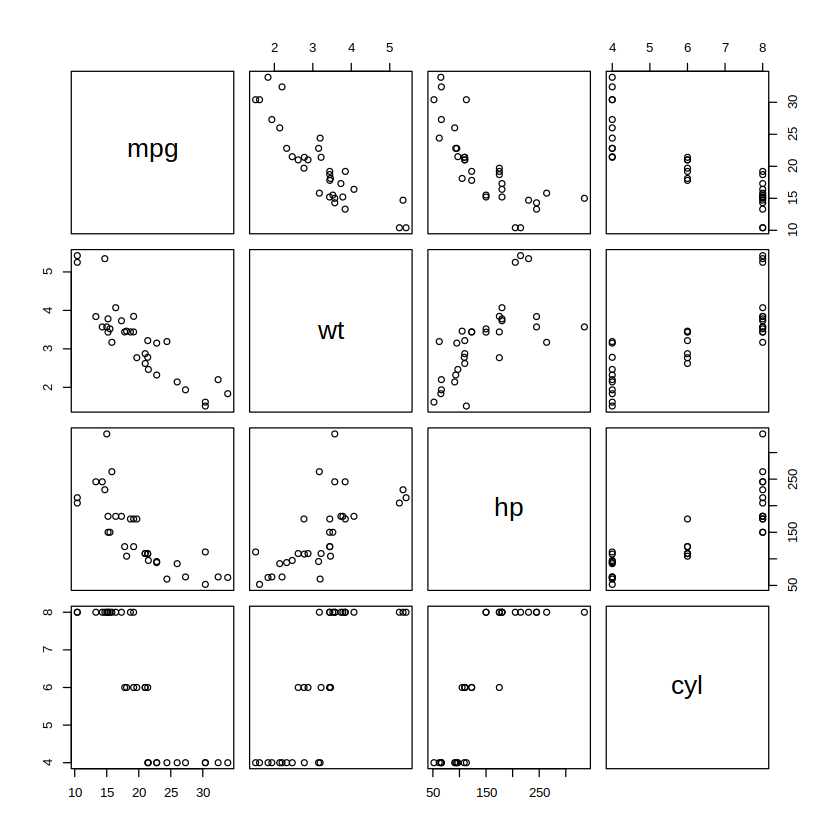

In [128]:
pairs(mpg ~ wt + hp + cyl, data = mtcars)

In [129]:
reg <- lm(mpg ~ ., data=mtcars)
summary(reg)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.45  -1.60  -0.12   1.22   4.63 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  12.3034    18.7179    0.66    0.518  
cyl          -0.1114     1.0450   -0.11    0.916  
disp          0.0133     0.0179    0.75    0.463  
hp           -0.0215     0.0218   -0.99    0.335  
drat          0.7871     1.6354    0.48    0.635  
wt           -3.7153     1.8944   -1.96    0.063 .
qsec          0.8210     0.7308    1.12    0.274  
vs            0.3178     2.1045    0.15    0.881  
am            2.5202     2.0567    1.23    0.234  
gear          0.6554     1.4933    0.44    0.665  
carb         -0.1994     0.8288   -0.24    0.812  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.6 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.807 
F-statistic: 13.9 on 10 and 21 DF,  p-value: 3.79e-07


In [132]:
library(car)

print(sqrt(vif(reg)))

 cyl disp   hp drat   wt qsec   vs   am gear carb 
 3.9  4.6  3.1  1.8  3.9  2.7  2.2  2.2  2.3  2.8 


In [133]:
print(sqrt(vif(reg)) > 2)

  cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb 
 TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 


In [134]:
reg <- lm(mpg ~ ., data=mtcars)
step(reg, directions = 'backward')

Start:  AIC=71
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq RSS  AIC
- cyl   1      0.08 148 68.9
- vs    1      0.16 148 68.9
- carb  1      0.41 148 69.0
- gear  1      1.35 149 69.2
- drat  1      1.63 149 69.2
- disp  1      3.92 151 69.7
- hp    1      6.84 154 70.3
- qsec  1      8.86 156 70.8
<none>              148 70.9
- am    1     10.55 158 71.1
- wt    1     27.01 174 74.3

Step:  AIC=69
mpg ~ disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq RSS  AIC
- vs    1      0.27 148 67.0
- carb  1      0.52 148 67.0
- gear  1      1.82 149 67.3
- drat  1      1.98 150 67.3
- disp  1      3.90 152 67.7
- hp    1      7.36 155 68.5
<none>              148 68.9
- qsec  1     10.09 158 69.0
- am    1     11.84 159 69.4
- wt    1     27.03 175 72.3

Step:  AIC=67
mpg ~ disp + hp + drat + wt + qsec + am + gear + carb

       Df Sum of Sq RSS  AIC
- carb  1      0.69 148 65.1
- gear  1      2.14 150 65.4
- drat  1      2.21 


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Coefficients:
(Intercept)           wt         qsec           am  
       9.62        -3.92         1.23         2.94  


In [135]:
reg_f <- lm(mpg ~ wt + qsec + am, data=mtcars)
summary(reg_f)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.481 -1.556 -0.726  1.411  4.661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.618      6.960    1.38  0.17792    
wt            -3.917      0.711   -5.51    7e-06 ***
qsec           1.226      0.289    4.25  0.00022 ***
am             2.936      1.411    2.08  0.04672 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.5 on 28 degrees of freedom
Multiple R-squared:  0.85,	Adjusted R-squared:  0.834 
F-statistic: 52.7 on 3 and 28 DF,  p-value: 1.21e-11


In [137]:
print(sqrt(vif(reg_f)))

  wt qsec   am 
 1.6  1.2  1.6 
